In [1]:
from related_posts_generator import Post, get_all_posts
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import umap
from pathlib import Path
from tqdm.notebook import trange, tqdm
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
# from multiprocessing import Pool
from concurrent.futures import ThreadPoolExecutor
import time

nltk.download("punkt")
%matplotlib widget

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def get_all_posts_oscean() -> list[Post]:
    all_posts_paths = Path.glob(Path("/home/wint3rmute/oscean/site/"), "**/*.html")
    all_posts_paths = [path for path in all_posts_paths]

    with ThreadPoolExecutor() as p:
        all_posts = list(tqdm(p.map(Post.from_path, all_posts_paths), total=len(all_posts_paths)))
        return all_posts

all_posts = get_all_posts() #_oscean()

In [3]:
# all_posts[1]

In [4]:
def custom_tokenizer(text: str) -> list[str]:
    stemmer = SnowballStemmer("english")
    words = word_tokenize(text) 
    
    return [stemmer.stem(word) for word in words]

In [5]:

# Vectorizer to convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

# Learn vocabulary and idf, return term-document matrix.
tfidf = vectorizer.fit_transform([post.content for post in all_posts])

umap_result = umap.UMAP().fit_transform(
    tfidf
)

In [6]:
# sorted(list(vectorizer.vocabulary_.keys()))[:30]

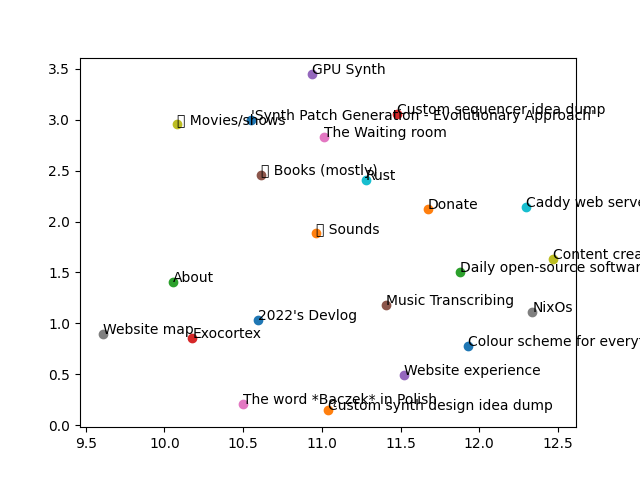

In [8]:
plt.close()

from itertools import count
import random
# index = count()
for post, post_position, post_index in zip(all_posts, umap_result, count()):
    plt.scatter(post_position[0], post_position[1])
    
    # if random.choice([1,2]) == 1:
    plt.annotate(post.title, post_position, post_position)

plt.show()